<a href="https://colab.research.google.com/github/Kumarisimran626/S.K-Retail_sales_prediction/blob/main/S_K_Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

#<b/>Project Type - Regression</b>


#<b/>Contribution - Individual
###Name - Simran Kumari</b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

#<b/>Project Summary -</b>


## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##Business Problem
The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely.
 Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time.
 This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

 Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

####Approach
* Business Problem
* Data Collection and Preprocessing
      - Importing important libraries and modules
      - Data Cleaning
      - Missing Data Handling
      - Merging the Datasets
* Exploratory Data Analysis
      - Hypothesis
      - Categorical Features
      - Continuous Features
      - EDA Conclusion and Validating Hypotheses
* Feature Selection and Outlier Detection
      - Feature Engineering
      - Outlier Detection and Treatment
* Modeling
      - Train Test Split
      - Baseline Model - Decision Tree
      - Random Forest Model
      - Random Forest Hyperparameter Tuning
      - Random Forest Feature Importance
* Model Performance and Evaluation
        - Visualizing Model Performances
        - Random Forest vs Baseline Model
        - Random Forest Tuned vs Baseline and Random Forest Models
* Store wise Sales Predictions
* Conclusion and Recommendations


#<b/>Let's Begin!</b>

#<b/>Importing essential libraries</b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
from scipy import stats
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime


# importing missingo library which helps us to visualize the missing values
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Define the directory path  files are located
file_directory = '/content/drive/MyDrive/Retail sales prediction/'

# Read the Rossmann Stores Data
rossmann_df = pd.read_csv(file_directory + 'Rossmann Stores Data.csv')

# Read the store data
store_df = pd.read_csv(file_directory + 'store.csv')

# <b>Exploring and Understanding more about data</b>


In [ ]:
#total number of row and columns
rossmann_df.shape

(1017209, 9)

In [ ]:
#we have historical sales data and stores datasets
#first look of the sales data
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossmann_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are  1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types.

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#shape of the stores data
store_df.shape

(1115, 10)

In [ ]:
#info about the stores
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.

In [ ]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in Rossmann dataset: {rossmann_df.duplicated().sum()}")
print(f"Number of duplicated rows in Store dataset: {store_df.duplicated().sum()}")

Number of duplicated rows in Rossmann dataset: 0
Number of duplicated rows in Store dataset: 0


We do not have any duplicated rows in both the dataset and that is very good for us.

####Missing Data Handling

In [ ]:
#null values in stores df
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

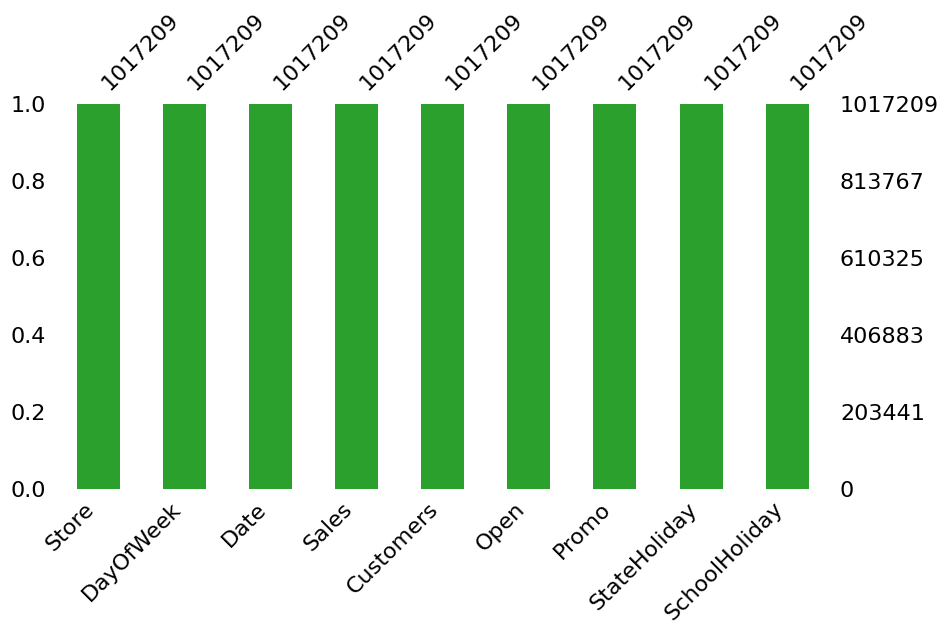

In [ ]:
# Visualizing the missing values in Rossmann dataset
msno.bar(rossmann_df,figsize=(10,5), color="tab:green")

<Axes: >

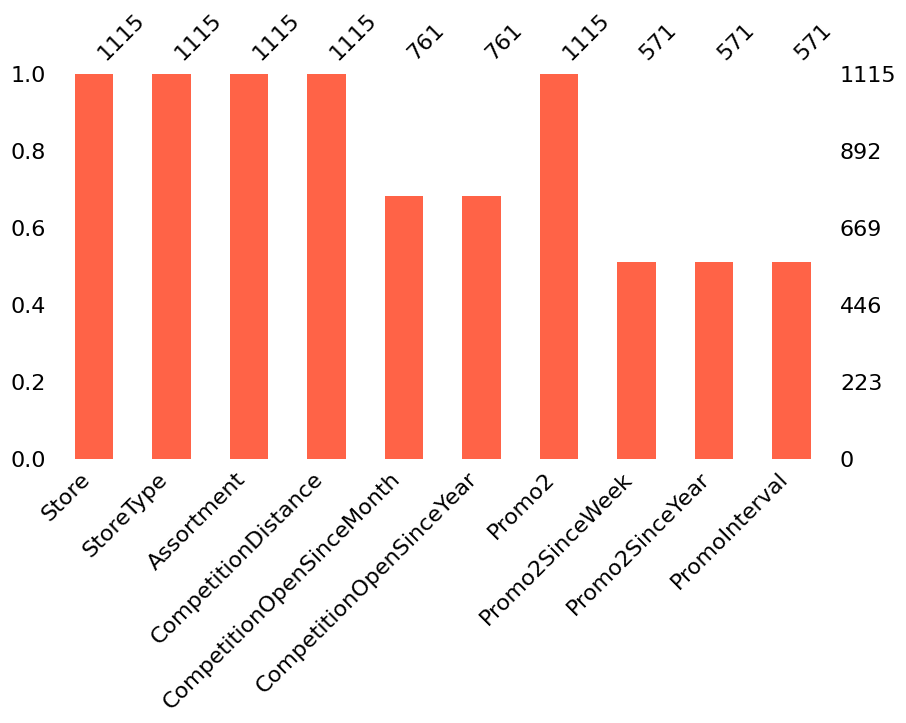

In [103]:
# Visualizing the missing values in Store dataset
msno.bar(store_df,figsize=(10,5),color="tomato")

There are missing values (NaN) in several columns: **'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'PromoInterval', 'Promo2SinceWeek', 'Promo2SinceYear', and only a few null values in 'CompetitionDistance'**. We need to address and clean these missing values in the dataset.

### 1. CompetitionDistance

Text(0.5, 0, 'Competition Distance Distribution Plot')

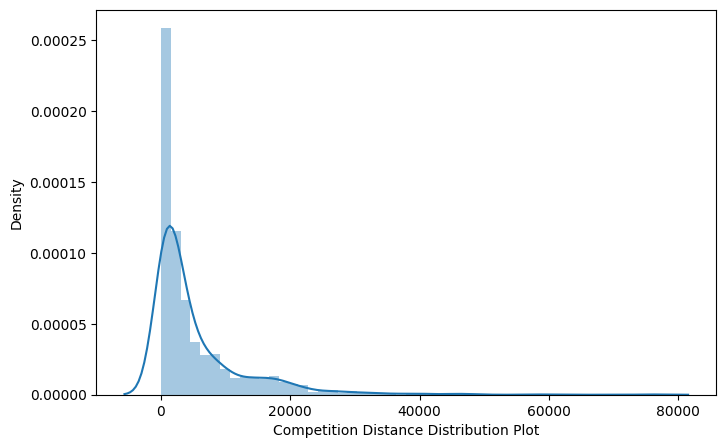

In [ ]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In order to fill the null values of CompetitionDistance we have 4 options:
1. Zero(0) >> Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.
2. Mean >> Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. Median >> To get good results replacing with median can be a better choice.
4. Mode >> Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the median.

In [ ]:
## code for replacing Nan values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

### 2. 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'

There are not much information provided to these data. Also we observe from dataset that where the **Promo2** has value equals to zero there are Nan values for these columns. That means the store which do not wat promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

In [ ]:
## code for replacing Nan values with 0.

store_new = store_df.copy()

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

## Now checking Nan values
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

Till now we get to know the following points about our dataset:
1. **'Rossmann dataset'** is having **1017209 rows and 9 columns** and does not have any null value.
2. **'Stores dataset'** is having **1115 rows and 10 columns**. It contains null values in total six features viz. CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval.
3. There are **no duplicate** values present in both the datasets.
4. There are total 4 **categorical features** in 'Rossmann' dataset namely Open, Promo, StateHoliday and SchoolHoliday and 'Stores' contain categorical features namely StoreType, Assortment, Promo2, PromoInterval.




##  Merging datasets: We don't want to compromise with quality and quantity of our dataset in order to get the best accuracy in ML model implementation. So, we were wondering to use the best join for the good results and we got to know with our R&D that every join is giving the same shape of our merged dataset with 0 null values. So, we have decided to go with the inner join.

In [106]:
#using inner join for our further analysis
final_1= pd.merge(rossmann_df, store_new, on="Store", how= "left")
final_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [108]:
final_1.shape

(1017209, 18)

In [ ]:
#checking info of our final merged dataset
final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#<b/>Changing different dtypes to int type.</b>

In [133]:
# code for changing StateHoliday dtype from object to int.
final_1.loc[final_1['StateHoliday'] == '0', 'StateHoliday'] = 0
final_1.loc[final_1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final_1.loc[final_1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final_1.loc[final_1['StateHoliday'] == 'c', 'StateHoliday'] = 3
final_1['StateHoliday'] = final_1['StateHoliday'].astype(int, copy=False)

print('levels :', final_1['StateHoliday'].unique(), '; data type :', final_1['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [134]:
# code for changing format of date from object to datetime
final_1['Date'] = pd.to_datetime(final_1['Date'], format= '%Y-%m-%d')

In [135]:
final_1['CompetitionOpenSinceYear'] = pd.to_numeric(final_1['CompetitionOpenSinceYear'], errors='coerce').astype('Int64')
final_1['Promo2SinceYear'] = pd.to_numeric(final_1['Promo2SinceYear'], errors='coerce').astype('Int64')


In [136]:
final_1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final_1['Date']).month

In [137]:
final_1['CompetitionDistance'] = pd.to_numeric(final_1['CompetitionDistance'], errors='coerce').astype('Int64')
final_1['Promo2SinceWeek'] = pd.to_numeric(final_1['Promo2SinceWeek'], errors='coerce').astype('Int64')


#<b/>checking dtypes of columns</b>

In [115]:
#Datatypes of columns
final_1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                            int64
CompetitionDistance                   Int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              Int64
Promo2                                int64
Promo2SinceWeek                       Int64
Promo2SinceYear                       Int64
PromoInterval                        object
dtype: object

#<b/>Exploratory Data Analysis</b>

In [116]:
final_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,0,29910,7,2015,0,0,0,0


In [117]:

final_1.shape

(1017209, 18)

In [118]:
final_1.describe().apply(lambda s: s.apply('{0:2f})'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000),1017209.000000)
mean,558.429727),3.998341),5773.818972),633.145946),0.830107),0.381515),0.178647),0.935141),5422.020804),5.846762),1370.172511),0.500564),11.647665),1007.010608)
std,321.908651),1.997391),3849.926175),464.411734),0.375539),0.485759),0.383056),0.993801),7706.918259),3.326097),935.363448),0.500000),15.323928),1005.876930)
min,1.000000),1.000000),0.000000),0.000000),0.000000),0.000000),0.000000),0.000000),20.000000),1.000000),0.000000),0.000000),0.000000),0.000000)
25%,280.000000),2.000000),3727.000000),405.000000),1.000000),0.000000),0.000000),0.000000),710.000000),3.000000),0.000000),0.000000),0.000000),0.000000)
50%,558.000000),4.000000),5744.000000),609.000000),1.000000),0.000000),0.000000),0.000000),2325.000000),6.000000),2006.000000),1.000000),1.000000),2009.000000)
75%,838.000000),6.000000),7856.000000),837.000000),1.000000),1.000000),0.000000),2.000000),6880.000000),8.000000),2011.000000),1.000000),22.000000),2012.000000)
max,1115.000000),7.000000),41551.000000),7388.000000),1.000000),1.000000),1.000000),2.000000),75860.000000),12.000000),2015.000000),1.000000),50.000000),2015.000000)


In [119]:
final_1.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,0,1900,1,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,2,1880,1,2006,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,2,9260,1,0,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,2,870,1,0,0,0,0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,2,5350,1,0,1,22,2012,"Mar,Jun,Sept,Dec"


###**Univariate Analysis**

####**Chart-1: Checking frequency distribution of continous features-Sales, CompetitionDistance, Customers:**

Text(0.5, 1.0, 'Density distribution of Customers')

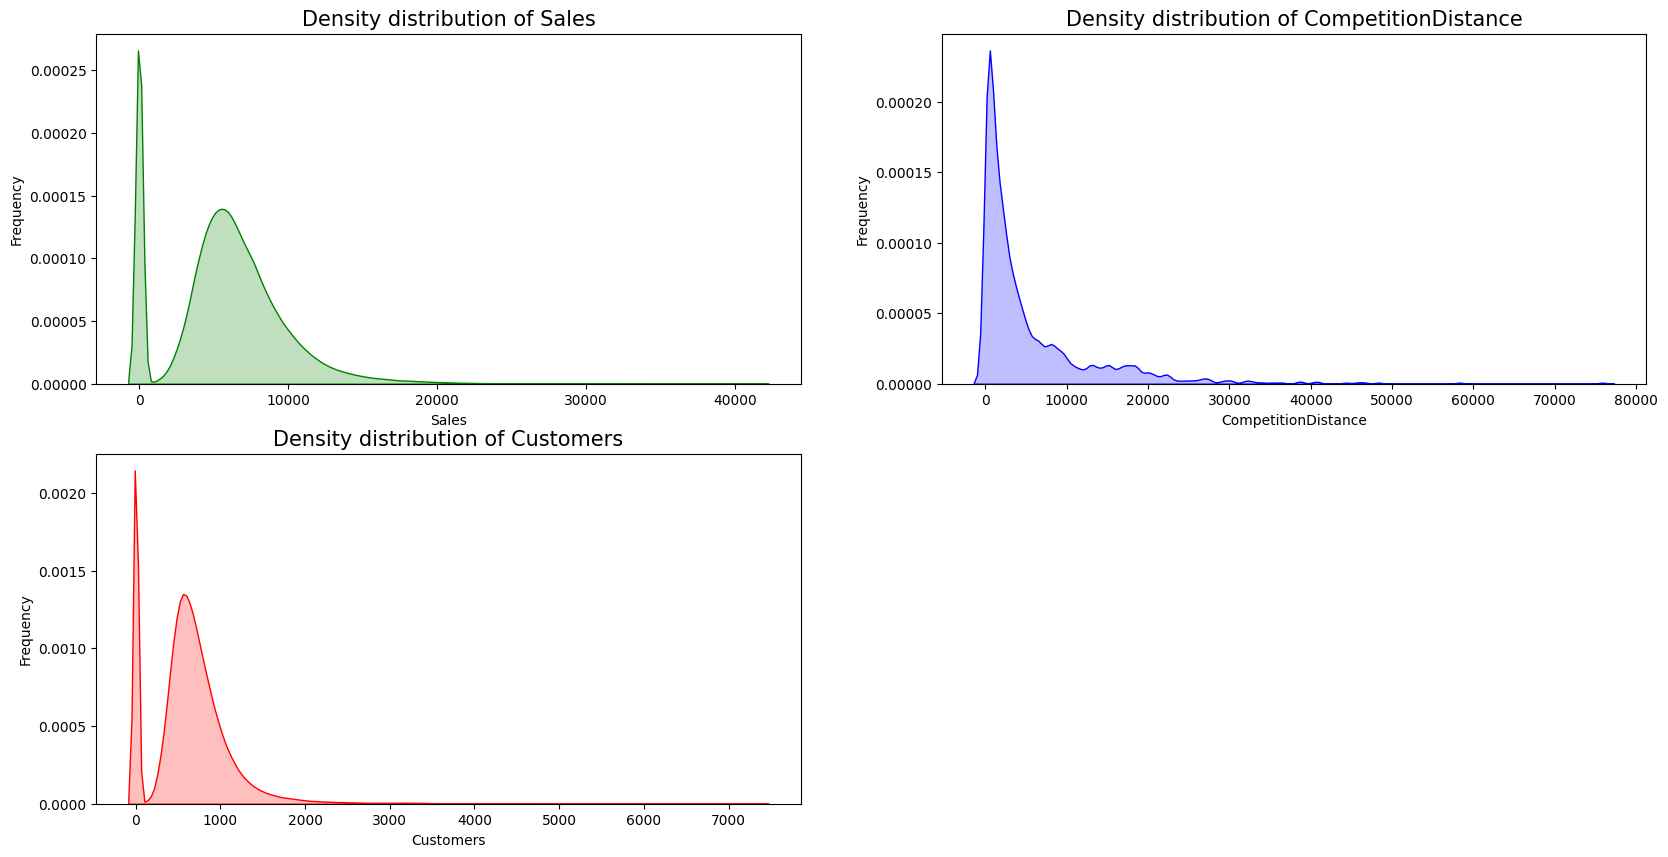

In [120]:

#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(final_1["Sales"], color="Green", shade = True)  #kernel density estimate (KDE) plot
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(final_1["CompetitionDistance"], color="Blue", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(final_1["Customers"], color="Red", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of Customers',size = 15)


1. Avarage Sales value is under 5000 and graph is rightly skewed, which shows most of the stores are open where the middle class resides.

2. We can clearly observe that most of the stores have their competition within
   5Km range which indicates mostly competiting stores are located nearby to   each other.

3. Avarage number of customer visiting stores is 700.

1. As we can see most of the sales are under 1000, to expand their business and sales they should **open their stores in posh area** or where the upper class lives.

2. I plotted frequency distribution graph for sales, customer and competition distance with the help of which we came to know that many competiting stores are densly located. so, business should **plan different strategies** to sustain in the competitive market.

####**Chart-2: Checking frequency distribution of continous features-SchoolHoliday, Promo, Promo2:**

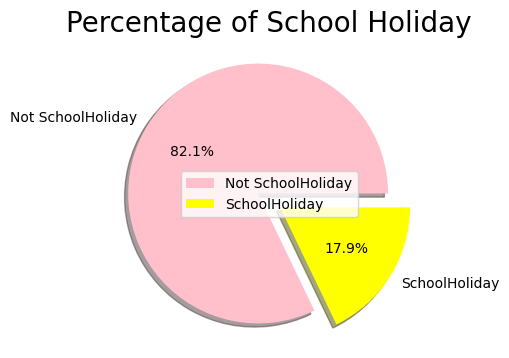

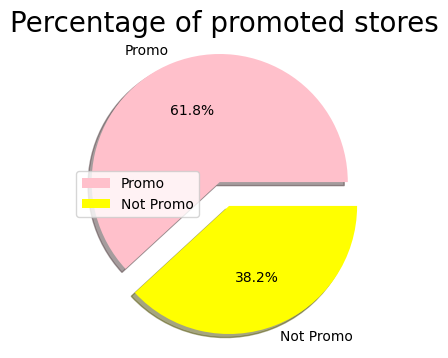

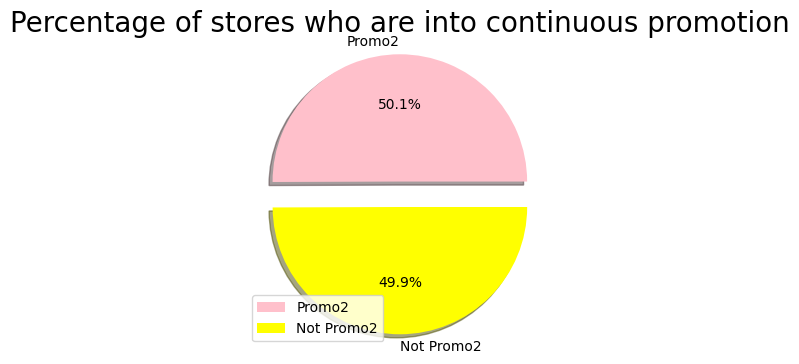

In [121]:

#Lets check distribution for Some discrete features(SchoolHoliday,Promo,Promo2):
labels = 'Not SchoolHoliday' , 'SchoolHoliday'
sizes = final_1.SchoolHoliday.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of School Holiday",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

labels = 'Promo' , 'Not Promo'
sizes = final_1.Promo.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of promoted stores",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

labels = 'Promo2' , 'Not Promo2'
sizes = final_1.Promo2.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of stores who are into continuous promotion",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

1.From first pie chart We can say that market will observe approx 20% of school Holidays.

2.We see that 44.6% of stores are into promotions and 55.4% of stores are not into promotions .The reason that more stores are not into promotions may be they don't have the enough budget or they may not see enough need for promotions.

3.From Third chart we can infer that there is almost equal percentage of stores getting promoted and the one which are not getting promoted.

1. From above pie chart we understood that percentage of stores getting promoted is more than non promoting stores but sales are positively correlated to promo meaning **if stores are getting promoted sale is increasing**. So, business should try promoting the stores to increase the revenue.
2. Later we will see if their is any impact of School holiday on sale on sale.

### **3) store type   and it's influence on sales**

In [122]:
#Store Type and Sales Exploration
store_type = final_1.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


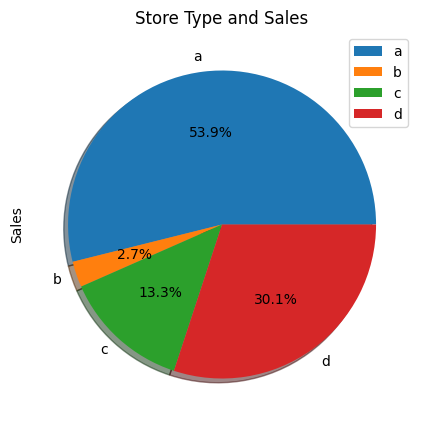

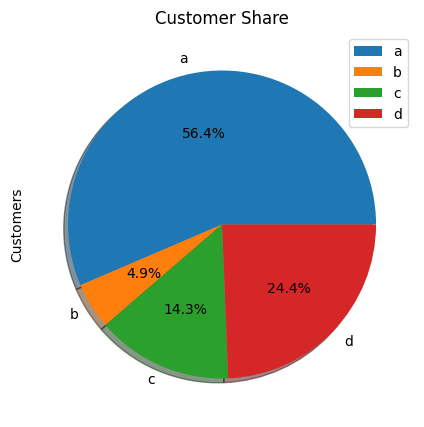

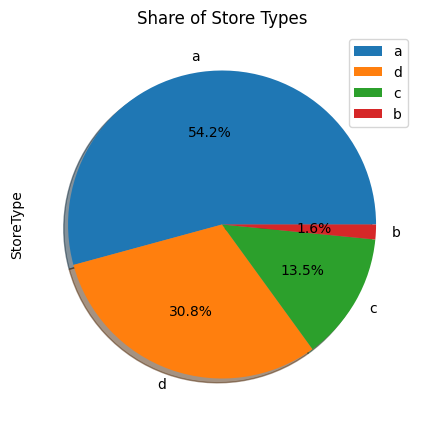

In [123]:

#let's explore store type a bit and it's influence on sales
final_1.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
final_1.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
final_1["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

####Observation:
* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.



###**Bivariate Analysis**

#### **1- Sales vs DayOfWeek**

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

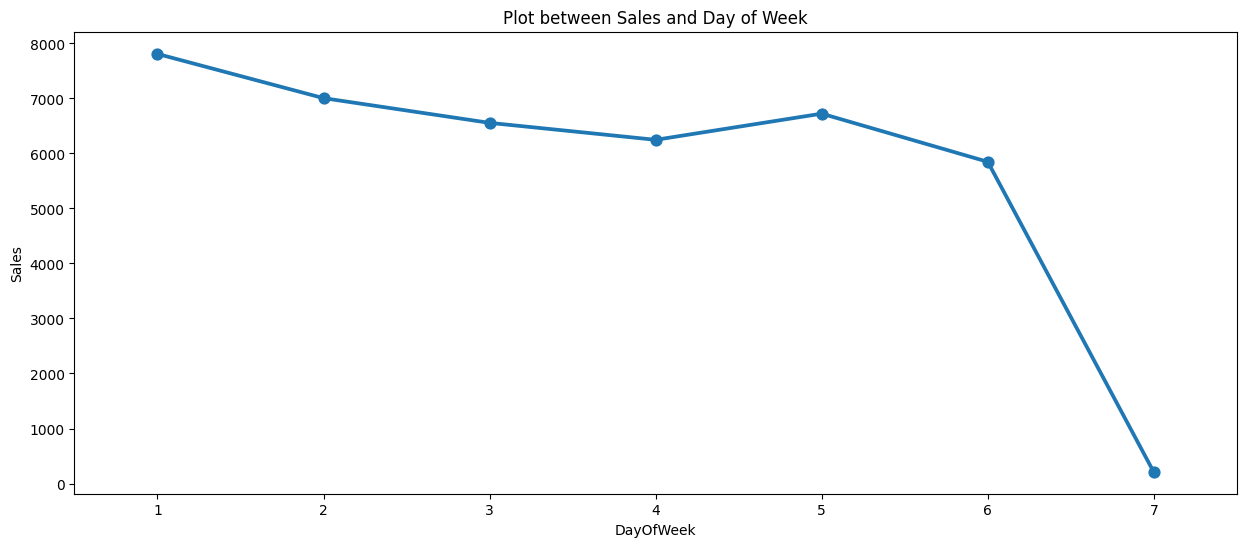

In [124]:

plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final_1)
plt.title('Plot between Sales and Day of Week')

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

### **2-Sales vs Year**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

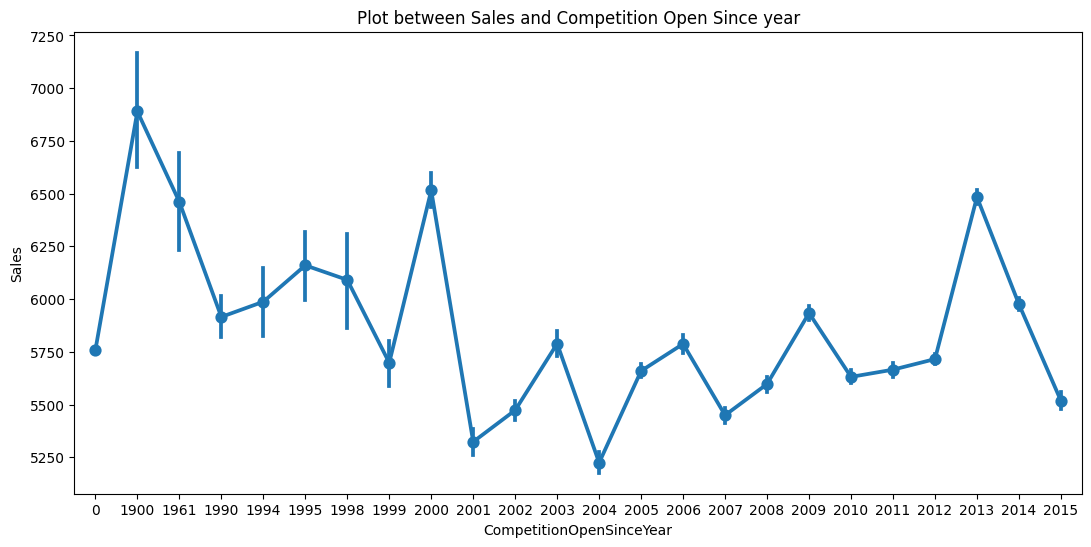

In [125]:

plt.figure(figsize=(13,6))
sns.pointplot (x='CompetitionOpenSinceYear', y= 'Sales', data=final_1)
plt.title('Plot between Sales and Competition Open Since year')

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

#### **3- Sales vs Month**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

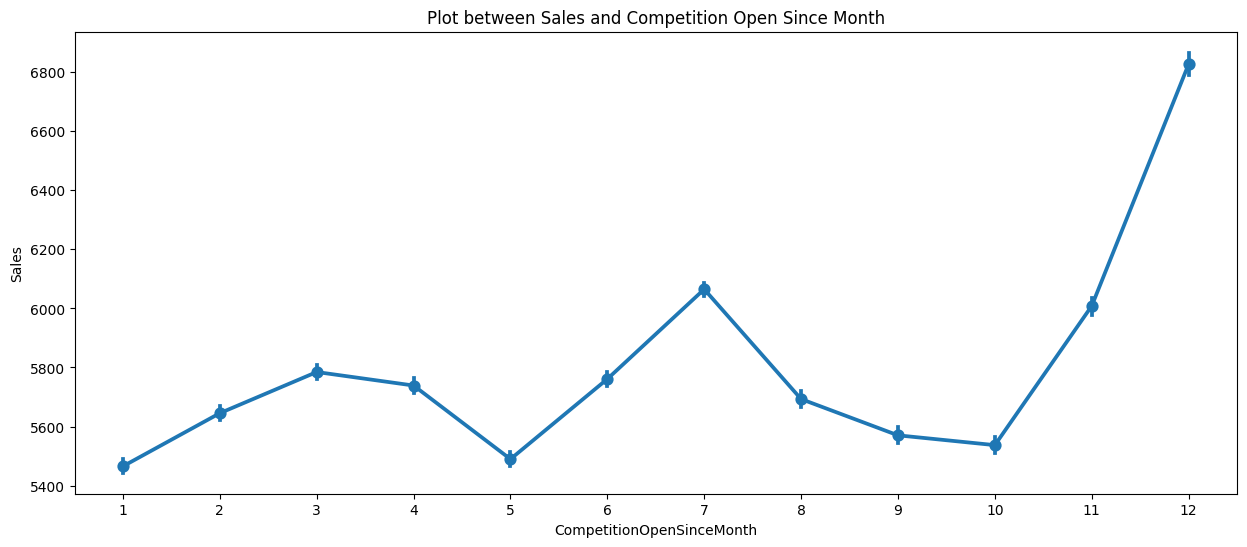

In [126]:

plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final_1)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December monthdue to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

#### **4- Sales vs Promo**

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

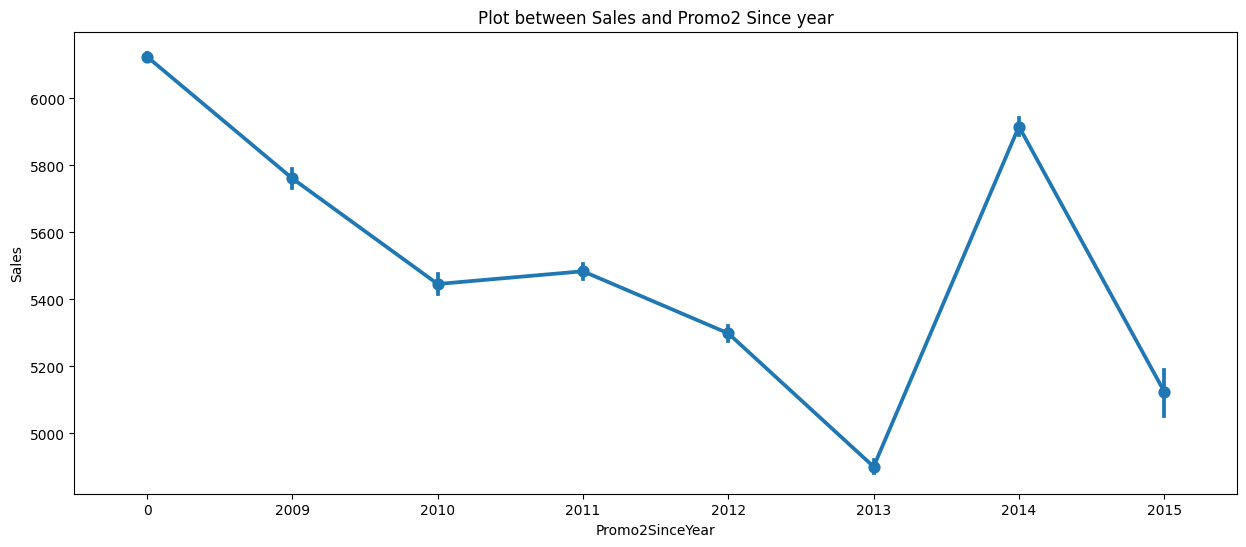

In [127]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final_1)
plt.title('Plot between Sales and Promo2 Since year')

Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotion. this data is available from yaer 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

#<b/>5-Sales vs StateHoliday and SchoolHoliday</b>

Sales during State Holiday

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

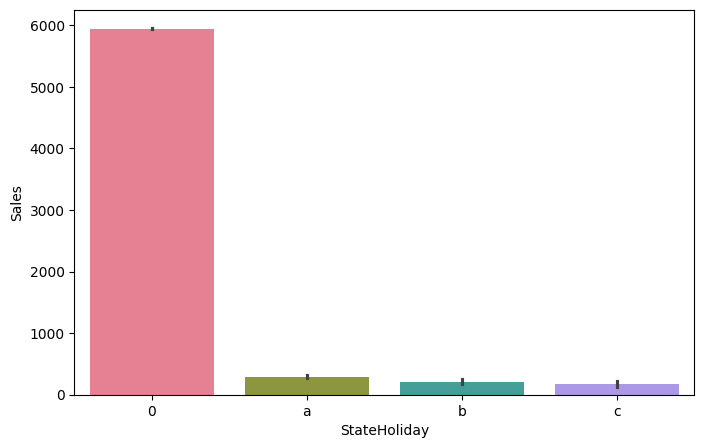

In [128]:

custom_palette = sns.color_palette("husl", 4)
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final_1, palette=custom_palette)


Sales during school holiday

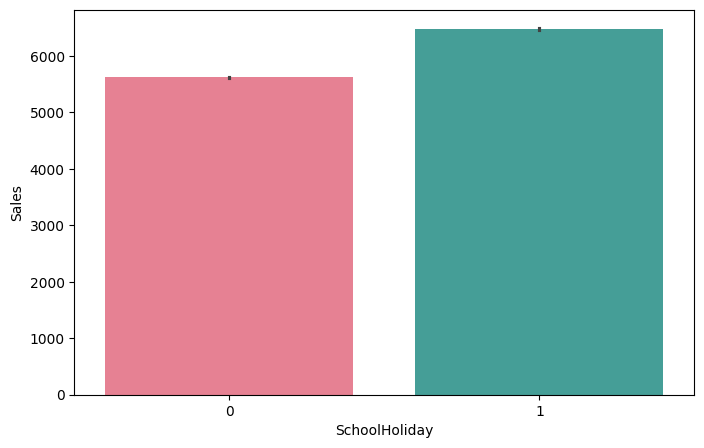

In [129]:
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final_1, palette="husl")

Here we can see that the most of the stores remained closed during state holiday. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

#### **Chart-8: Sales vs StoreType**

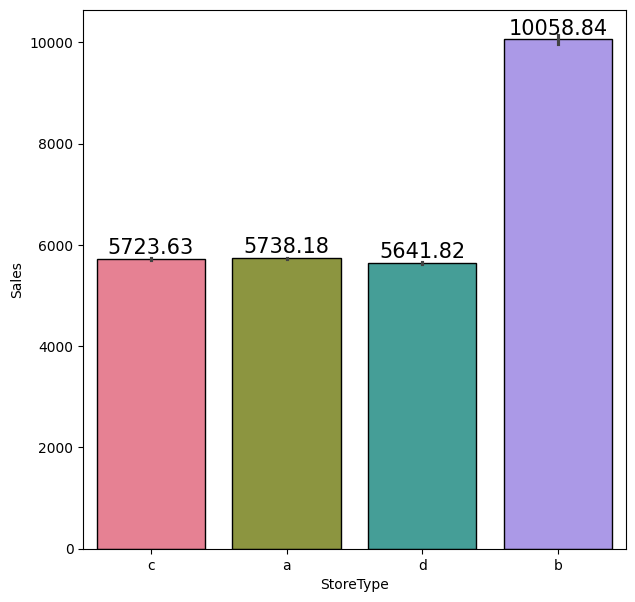

In [130]:

plt.figure(figsize=(7, 7))
plots = sns.barplot(x=final_1['StoreType'], y=final_1['Sales'], edgecolor='black', palette="husl")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


1. Sales for the store type b is the highest . **Store type B might be located in a more affluent or high-traffic area**, which would increase the number of potential customers. Store type B may have a more favorable layout, which makes it more attractive to customers and makes it easier for them to find the products they want, resulting in more sales.

2. Earlier we have drawn the univeriate graph of Store type to know which type of store are more in numbers, and we found that store type a,c,d are more but this is not the case with the sales even though **storetype_b are less still they are making more profit**.

3. It might be the case that store type_b contain **costly**, **luxerious items**.



4. Since store type 'a','c' and 'd' are generating similar sales and lower than store type 'b', they can follow the business strategies, **marketing tactics of store type 'b'.**

5. Company should **open stores of type_b** to gain more profit.

In [139]:
merged_df = pd.merge(rossmann_df, store_new, on='Store', how='left')

Within this training set, Storetype A is observed to have the largest count of branches, sales, and customers among the four different store types. However, this does not necessarily indicate that it is the top-performing Storetype.

Upon closer examination of the average sales and the number of customers, it becomes apparent that Storetype B actually demonstrates the highest average sales and the highest average number of customers.

#### **Chart-9: Sales vs Assortment**

StoreType  Assortment
a          a             346389
           c             205238
b          a               6594
           b               8294
           c                942
c          a              70878
           c              65962
d          a             113584
           c             199328
Name: Assortment, dtype: int64

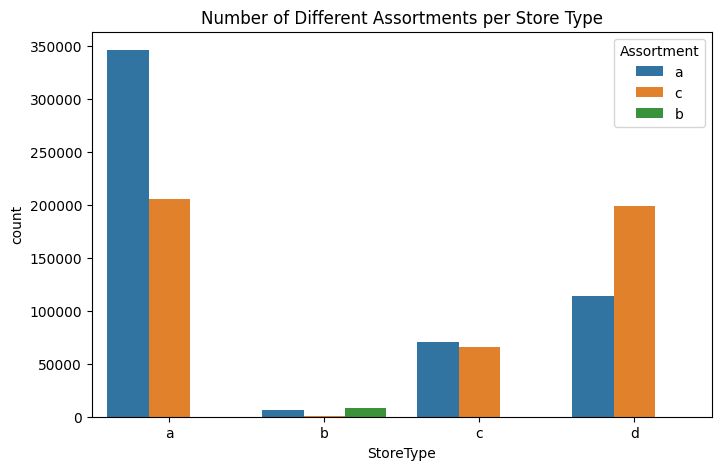

In [141]:
Storetype_Assortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=merged_df,palette=sns.color_palette(n_colors=3)).set_title("Number of Different Assortments per Store Type")
merged_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

### The data shows that most stores are categorized as either 'a' or 'c' assortment types. Interestingly, the 'd' StoreType, which has the highest average sales per customer, is predominantly comprised of 'c' assortment type stores. This correlation likely drives the high average sales per customer. Diverse store assortments often lead to increased customer spending behaviors.